**GAIN CHART AND LIFT CHART**

The data describes a problem in which a bank is interested in predicting which customers may respond to their direct marketing campaign to open a term deposti with the bank. The respone=se varaible Y = 1 implies that the customer opens a term depostit after the campaign and Y = 0 otherwise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Loading and Preparing the Dataset**

In [7]:
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [9]:
X_features = list(bank_df.columns)
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [10]:
encoded_bank_df = pd.get_dummies(bank_df[X_features], drop_first=True, dtype='int64')

In [13]:
Y = bank_df.subscribed.map(lambda x: int(x == 'yes'))
X = encoded_bank_df

Here the dataset is not into training and test datasets for simplicity as our objective is primarily to understand gain and lift chart 

**Building the Logistic Regression Model**

In [14]:
logit_model = sm.Logit(Y, sm.add_constant(X)).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   subscribed       Pseudo R-squared: 0.061     
Date:                 2025-06-04 15:13 AIC:              3082.2384 
No. Observations:     4521             BIC:              3236.2341 
Df Model:             23               Log-Likelihood:   -1517.1   
Df Residuals:         4497             LL-Null:          -1615.5   
Converged:            1.0000           LLR p-value:      1.4866e-29
No. Iterations:       7.0000           Scale:            1.0000    
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
current-campaign    -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous-campaign    0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing-loan_yes    -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
personal-loan_yes   -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [15]:
def get_significant_vars(lm):
    # Store the p-values and corresponding column names in a dataframe
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    # Filter the column names where p-values if less than 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [16]:
significant_vars = get_significant_vars(logit_model)
significant_vars

['const',
 'current-campaign',
 'previous-campaign',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [20]:
X_features = [
 'current-campaign',
 'previous-campaign',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [21]:
logit_model_2 = sm.Logit(Y, sm.add_constant(X[X_features])).fit()
logit_model_2.summary2()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   subscribed       Pseudo R-squared: 0.056     
Date:                 2025-06-04 15:16 AIC:              3065.2182 
No. Observations:     4521             BIC:              3116.5501 
Df Model:             7                Log-Likelihood:   -1524.6   
Df Residuals:         4513             LL-Null:          -1615.5   
Converged:            1.0000           LLR p-value:      8.1892e-36
No. Iterations:       7.0000           Scale:            1.0000    
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.4754   0.1133 -13.0260 0.0000 -1.6974 -1.2534
current-campaign   -0.0893   0.0236  -3.7925 0.0001 -0.1355 -0.0432
previous-campaign   0.1419   0.0211   6.7097 0.0000  0.1004  0.1833
job_retired         0.8246   0.1731   4.7628 0.0000  0.4853  1.1639
marital_married    -0.3767   0.0969  -3.8878 0.0001 -0.5667 -0.1868
education_tertiary  0.2991   0.1014   2.9500 0.0032  0.1004  0.4978
housing-loan_yes   -0.5834   0.0986  -5.9179 0.0000 -0.7767 -0.3902
personal-loan_yes  -0.7025   0.1672  -4.2012 0.0000 -1.0302 -0.3748
===================================================================

"""

p_value for LLR(Likelihood Ratio Test) shows (less than 0.05) that the overall model is significant.

In [25]:
y_pred_df = pd.DataFrame({'actual': Y, 'predicted_prob': logit_model_2.predict(sm.add_constant(X[X_features]))})
sorted_predicted_df = y_pred_df[['predicted_prob', 'actual']].sort_values('predicted_prob', ascending=False)

Now we will segment all the observations into deciles. First we will find the number of observations in each decile by dividing the total number of observations by 10.

In [27]:
num_per_decile = int(len(sorted_predicted_df) / 10)
print("Number of observations per decile: ", num_per_decile)

Number of observations per decile:  452


In [31]:
def get_deciles(df):
    # Set first decile
    df['decile'] = 1

    idx = 0
    # Iterate through all 10 deciles
    for each_d in range(0, 10):
        # Setting each 452 observations to one decile in sequence
        df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] = each_d
        idx += num_per_decile

    df['decile'] += 1
    return df


deciles_predict_df = get_deciles(sorted_predicted_df)
deciles_predict_df[0:10]

,predicted_prob,actual,decile
3682,0.864769,0,1
97,0.828031,0,1
3426,0.706809,0,1
1312,0.642337,1,1
3930,0.631032,1,1
4397,0.619146,0,1
2070,0.609129,0,1
3023,0.573199,0,1
4080,0.572364,0,1
804,0.559350,0,1


**Calculating Gain**

In [34]:
gain_lift_df = pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns = ['decile', 'gain']
gain_lift_df['gain_percentage'] = (100 * gain_lift_df.gain.cumsum() / gain_lift_df.gain.sum())
gain_lift_df

,decile,gain,gain_percentage
0,1,124,23.800384
1,2,85,40.115163
2,3,72,53.934741
3,4,50,63.531670
4,5,34,70.057582
5,6,46,78.886756
6,7,34,85.412668
7,8,32,91.554702
8,9,24,96.161228
9,10,20,100.000000


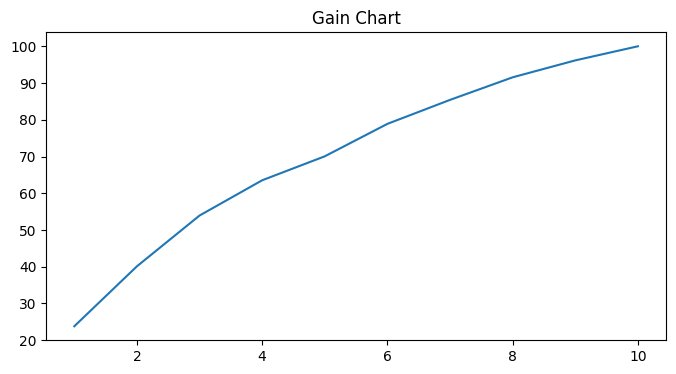

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(gain_lift_df['decile'], gain_lift_df['gain_percentage'], '-')
plt.title('Gain Chart')
plt.show()

**Calculating Lift**

In [37]:
gain_lift_df['lift'] = ((gain_lift_df.gain_percentage) / (gain_lift_df.decile * 10))
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,124,23.800384,2.380038
1,2,85,40.115163,2.005758
2,3,72,53.934741,1.797825
3,4,50,63.531670,1.588292
4,5,34,70.057582,1.401152
5,6,46,78.886756,1.314779
6,7,34,85.412668,1.220181
7,8,32,91.554702,1.144434
8,9,24,96.161228,1.068458
9,10,20,100.000000,1.000000


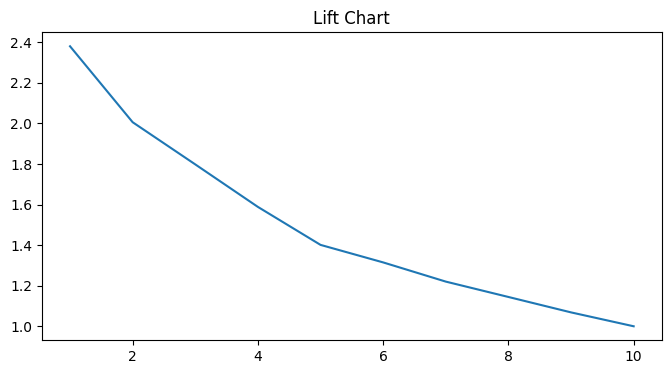

In [40]:
plt.figure(figsize=(8,4))
plt.plot(gain_lift_df['decile'], gain_lift_df['lift'], '-')
plt.title('Lift Chart')
plt.show()